#Profitable App Profiles for the App Store and Google Play Markets


##Opening and Exploring the Data

In [3]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from csv import reader

### The Google Play data set ###
opened_file = open("C:/Users/Jay Mataji/Downloads/googleplaystore.csv", encoding='utf-8')
read_file = reader(opened_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

### The App Store data set ###
opened_file = open("C:/Users/Jay Mataji/Downloads/AppleStore.csv", encoding='utf-8')
read_file = reader(opened_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

In [5]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line between rows
        
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

print(android_header)
print('\n')
explore_data(android, 0, 3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


In [6]:
print(ios_header)
print('\n')
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


##Deleting Wrong Data

In [8]:
print(android[10472])  # incorrect row
print('\n')
print(android_header)  # header
print('\n')
print(android[0])      # correct row

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


In [9]:
print(len(android))
del android[10472]  # don't run this more than once
print(len(android))

10841
10840


Removing Duplicate Entries

Part One

In [12]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


In [13]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
    
print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:15])

Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


Part Two


In [15]:
reviews_max = {}

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
        
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

In [23]:
print('Expected length:', len(android) - 1181)
print('Actual length:', len(reviews_max))

Expected length: 9659
Actual length: 9659


In [24]:
android_clean = []
already_added = []

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name) 

In [25]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


Removing Non-English Apps


Part One


In [30]:
print(ios[813][1])
print(ios[6731][1])

print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
中国語 AQリスニング
لعبة تقدر تربح DZ


In [32]:
def is_english(string):
    
    for character in string:
        if ord(character) > 127:
            return False
    
    return True

print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


In [33]:
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

print(ord('™'))
print(ord('😜'))

False
False
8482
128540


Part Two

In [35]:
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True

print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
True


In [36]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[0]
    if is_english(name):
        ios_english.append(app)
        
explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

Isolating the Free Apps

In [45]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)
        
print(len(android_final))
print(len(ios_final))

8864
4056


Most Common Apps by Genre

Part One


In [49]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages


def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

In [ ]:
display_table(android_final, 1) # Category

In [ ]:
display_table(android_final, -4)

import matplotlib.pyplot as plt
from collections import Counter

# Extract categories for free Android apps
categories_android = [app[1] for app in android_free]  # Modify index if needed

# Count frequency for top 10 categories
category_counts = Counter(categories_android)
android_labels, android_values = zip(*category_counts.most_common(10))

plt.figure(figsize=(10, 6))
plt.barh(android_labels[::-1], android_values[::-1], color='lightgreen')
plt.title('Top 10 Android App Categories (Free Apps)')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


Most Popular Apps by Genre on the App Store

In [55]:
genres_ios = freq_table(ios_final, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 53078.195804195806
Photo & Video : 27249.892215568863
Games : 18924.68896765618
Music : 56482.02985074627
Reference : 67447.9
Health & Fitness : 19952.315789473683
Weather : 47220.93548387097
Utilities : 14010.100917431193
Travel : 20216.01785714286
Shopping : 18746.677685950413
News : 15892.724137931034
Navigation : 25972.05
Lifestyle : 8978.308510638299
Entertainment : 10822.961077844311
Food & Drink : 20179.093023255813
Sports : 20128.974683544304
Book : 8498.333333333334
Finance : 13522.261904761905
Education : 6266.333333333333
Productivity : 19053.887096774193
Business : 6367.8
Catalogs : 1779.5555555555557
Medical : 459.75


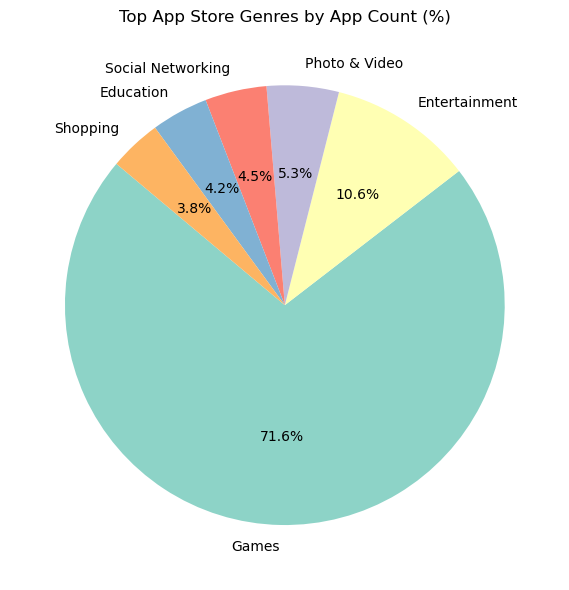

In [97]:
import matplotlib.pyplot as plt

# Calculate genre frequency from the iOS dataset
genre_freq_ios = freq_table(ios_final, -5)

# Sort and select top 6 genres by frequency
top_genres_ios = sorted(genre_freq_ios.items(), key=lambda x: x[1], reverse=True)[:6]
labels_ios = [item[0] for item in top_genres_ios]
sizes_ios = [item[1] for item in top_genres_ios]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes_ios, labels=labels_ios, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top App Store Genres by App Count (%)')
plt.tight_layout()
plt.show()


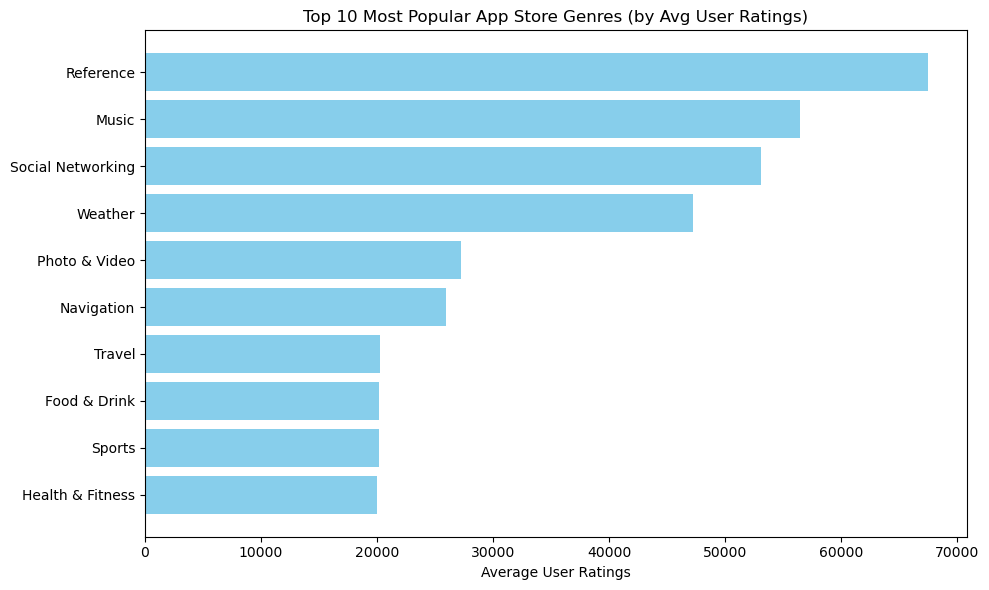

In [89]:
import matplotlib.pyplot as plt

# Step 1: Calculate average number of user ratings per genre
genre_ratings = {}

for app in ios_final:
    genre = app[-5]
    rating_count = float(app[5])
    
    if genre in genre_ratings:
        genre_ratings[genre].append(rating_count)
    else:
        genre_ratings[genre] = [rating_count]

avg_ratings_per_genre = []

for genre in genre_ratings:
    avg_rating = sum(genre_ratings[genre]) / len(genre_ratings[genre])
    avg_ratings_per_genre.append((genre, avg_rating))

# Step 2: Sort and plot
top_genres = sorted(avg_ratings_per_genre, key=lambda x: x[1], reverse=True)[:10]

genres = [item[0] for item in top_genres]
ratings = [item[1] for item in top_genres]

plt.figure(figsize=(10, 6))
plt.barh(genres[::-1], ratings[::-1], color='skyblue')
plt.xlabel('Average User Ratings')
plt.title('Top 10 Most Popular App Store Genres (by Avg User Ratings)')
plt.tight_layout()
plt.show()


In [57]:
for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5]) # print name and number of ratings

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
高德地图（精准专业的手机地图） : 1040
百度地图-智能的手机导航，公交地铁出行必备 : 1014
百度地图HD : 771
ImmobilienScout24: Real Estate Search in Germany : 187
ナビタイムの乗り換え案内 - 遅延情報やバス時刻表を案内するアプリ : 48
高德地图HD : 26
Railway Route Search : 5
NAVIRO(ナビロー) - カーナビ/バイクナビ/徒歩ナビが使える高性能ナビアプリ : 0
ホラースポット-ghost spot-意味が分かると怖いマップ : 0
MapFan(マップファン) – 渋滞情報/オービス/オフライン対応の本格カーナビ : 0
JR東日本アプリ : 0
えほう - 最強の恵方コンパス : 0
バーチャル恵方巻【節分・恵方コンパス・方位】 : 0
恵方コンパス. : 0
ナビタイム ドライブサポーター - NAVITIMEのカーナビアプリ : 0
自転車ナビ by NAVITIME(ナビタイム) - 自転車のナビができるアプリ : 0


In [59]:
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
彩库宝典-【官方版】 : 0
Jishokun-Japanese English Dictionary & Translator : 0
無料で音楽や写真・カメラの裏技アプリ for iPhone7 : 0


Most Popular Apps by Genre on Google Play

In [65]:
display_table(android_final, 5) # the Installs columns

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


In [67]:
categories_android = freq_table(android_final, 1)

for category in categories_android:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

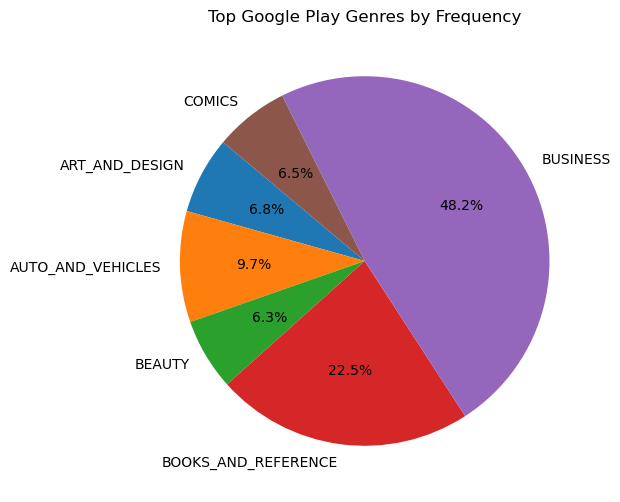

In [95]:
import matplotlib.pyplot as plt

# For Google Play
genre_freq = freq_table(android_final, 1)
labels = list(genre_freq.keys())[:6]  # Show top 6 only
sizes = list(genre_freq.values())[:6]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top Google Play Genres by Frequency')
plt.show()


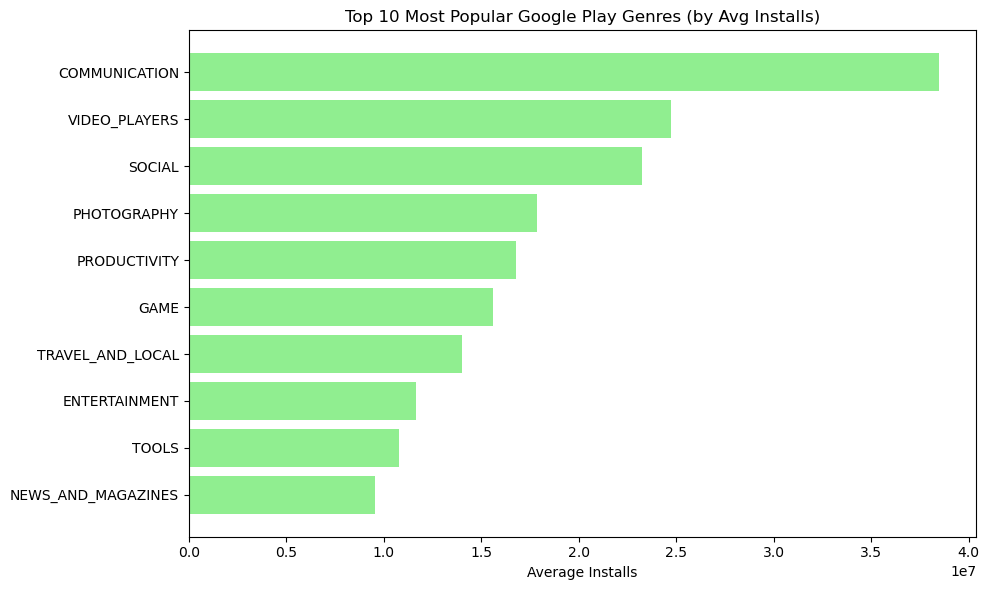

In [91]:
import matplotlib.pyplot as plt

# Step 1: Create genre → install list mapping
category_installs = {}

for app in android_final:
    category = app[1]
    installs = app[5].replace('+', '').replace(',', '')
    if installs.isdigit():
        installs = int(installs)
    else:
        continue
    
    if category in category_installs:
        category_installs[category].append(installs)
    else:
        category_installs[category] = [installs]

avg_installs_per_category = []

for category in category_installs:
    avg_install = sum(category_installs[category]) / len(category_installs[category])
    avg_installs_per_category.append((category, avg_install))

# Step 2: Sort and plot
top_categories = sorted(avg_installs_per_category, key=lambda x: x[1], reverse=True)[:10]

categories = [item[0] for item in top_categories]
installs = [item[1] for item in top_categories]

plt.figure(figsize=(10, 6))
plt.barh(categories[::-1], installs[::-1], color='lightgreen')
plt.xlabel('Average Installs')
plt.title('Top 10 Most Popular Google Play Genres (by Avg Installs)')
plt.tight_layout()
plt.show()


In [69]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

In [71]:
under_100_m = []

for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
sum(under_100_m) / len(under_100_m)

3603485.3884615386

In [73]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

In [75]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


In [82]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

Conclusions

In this project, we analyzed data about the App Store and Google Play mobile apps with the goal of recommending an app profile that can be profitable for both markets.

We concluded that taking a popular book (perhaps a more recent book) and turning it into an app could be profitable for both the Google Play and the App Store markets. The markets are already full of libraries, so we need to add some special features besides the raw version of the book. This might include daily quotes from the book, an audio version of the book, quizzes on the book, a forum where people can discuss the book, etc.